In [1]:
# 기본 세팅

import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib
import matplotlib.pyplot as plt  # 파이플롯 사용
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')  # 한글코드를 더 선명하게 해주는 조치, 레티나 설정
matplotlib.rc('font', family='AppleGothic') # 폰트 설정
matplotlib.rc('axes', unicode_minus=False) # 마이너스 폰트가 깨지는 경우가 있으므로 조치

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

In [2]:
# 통계 세팅

import scipy as sp
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency


import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.formula.api import ols

### 분포가 있는 두 샘플의 비교 t-test : stats.ttest_ind(x1, x2)

In [3]:
np.random.seed(12345678)

rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)

print(stats.ttest_ind(rvs1,rvs2))

print(stats.ttest_ind(rvs1,rvs2, equal_var = False))


Ttest_indResult(statistic=0.26833823296238857, pvalue=0.788494433695651)
Ttest_indResult(statistic=0.26833823296238857, pvalue=0.7884945274950106)


### 바이너리 분포 t-test 비교하기

P1 = 41/195 = 0.21 (that’s 21%)

P2 = 351/605 = 0.58 (that’s 58%)

In [4]:
p_1 = 41/195
p_2 = 351/605

In [5]:
statistic, p_value = stats.ttest_ind_from_stats(mean1=p_1, 
                                                std1=np.sqrt(p_1*(1-p_1)), 
                                                nobs1=195, 
                                                mean2=p_2, 
                                                std2=np.sqrt(p_2*(1-p_2)), 
                                                nobs2=605)


In [6]:
print(format(p_value, '.100f'))

0.0000000000000000000292903403051350772759983424636849837225482136640275851327888667618992712959880009


In [7]:
print(format(statistic, '.100f'))

-9.4758349718035077557942713610827922821044921875000000000000000000000000000000000000000000000000000000


#### AB 테스트에 대해서도 시도

In [8]:
p_1 = 375/1597 # experiment ctr
p_2 = 439 / 1661 # control ctr

# 귀무가설 이 두개의 ctr이 같다
# 대립가설 : 이 두 개의 ctr은 다르다
statistic, p_value = stats.ttest_ind_from_stats(mean1=p_1, 
                                                std1=np.sqrt(p_1*(1-p_1)), 
                                                nobs1=1597, 
                                                mean2=p_2, 
                                                std2=np.sqrt(p_2*(1-p_2)), 
                                                nobs2=1661)
print(statistic, format(p_value, '.3f'))

-1.9443675727573038 0.052


### ABC 테스트의 검정 - 일원적 카이제곱

In [9]:

observed, expected = [56, 42, 33], [55, 55, 55]
statistics, p_value = chisquare(observed, f_exp=expected)

print(format(p_value, '.100f'))
print(format(statistic, '.100f'))

0.0026177122087117222874741440108437018352560698986053466796875000000000000000000000000000000000000000
-1.9443675727573037637085917594959028065204620361328125000000000000000000000000000000000000000000000000


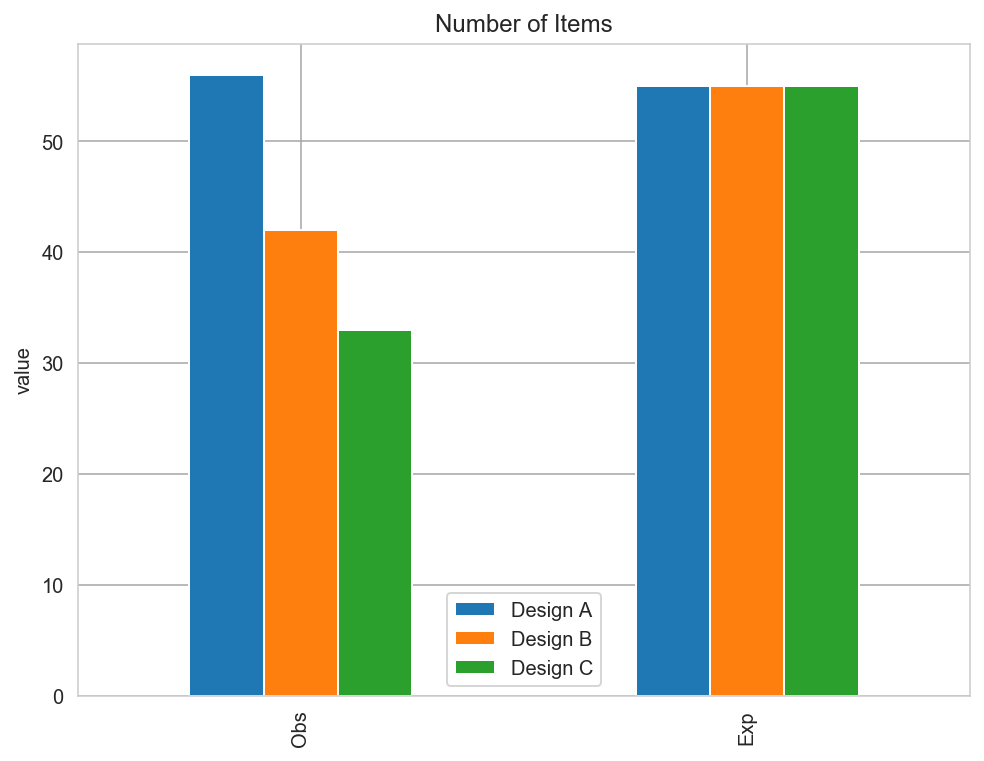

In [10]:

table = pd.DataFrame([observed, expected], columns=['Design A', 'Design B', 'Design C'], index=['Obs', 'Exp'])

ax = table.plot(kind='bar', title='Number of Items', figsize=(8, 6))
ax.set_ylabel('value')
plt.grid(color='darkgray')
plt.show()

In [11]:


tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

fstat, pval = stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)


In [12]:
print(format(pval, '.100f'))
print(format(fstat, '.100f'))

0.0002812242314534543871813732085485071365837939083576202392578125000000000000000000000000000000000000
7.1210194716424473071469947171863168478012084960937500000000000000000000000000000000000000000000000000


### two-way 카이제곱검정

In [13]:
# 컨틴전시 테이블 제작

male = [269, 83, 215]  # 디자인시안 A, B, C 순으로 클릭 량
female = [155, 57, 181]   # 디자인시안 A, B, C 순으로 클릭 량
cont_table = pd.DataFrame([male, female], columns=['Design_A', 'Design_B', 'Design_C'], index=['Male', 'Female'])

chi2, p_val, df, expected = chi2_contingency([male, female])

In [14]:
print(format(chi2, '.10f'))
print(format(p_val, '.10f'))
print(df)
print(expected)

7.0942644148
0.0288071342
2
[[250.425   82.6875 233.8875]
 [173.575   57.3125 162.1125]]


### two way ANOVA

In [15]:
data = pd.read_csv("two-way-anova-example.csv")

In [16]:
data.columns

Index(['Unnamed: 0', '체류시간', '성별', '디자인시안'], dtype='object')

예시 데이터 셋에서 필요한 칼럼들만 아래

formula 스트링 안에 넣어줍니다. R 언어는 모르지만 칼럼(C) 파트에 잘만 집어넣어주면 됩니다.

In [17]:
formula = '체류시간 ~ C(성별) + C(디자인시안) + C(성별):C(디자인시안)'
model = ols(formula, data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

In [18]:
aov_table

,sum_sq,df,F,PR(>F)
C(성별),205.350000,1.0,15.571979,2.311828e-04
C(디자인시안),2426.434333,2.0,91.999965,4.046291e-18
C(성별):C(디자인시안),108.319000,2.0,4.106991,2.186027e-02
Residual,712.106000,54.0,NaN,NaN


In [19]:
print(format(aov_table.iloc[0,-1], '.10f'))
print(format(aov_table.iloc[1,-1], '.10f'))
print(format(aov_table.iloc[2,-1], '.10f'))

0.0002311828
0.0000000000
0.0218602690


위 2-way 아노바 표의 해석은 다음과 같다

- PR(>F)는 F값을 바탕으로 도출한 p-value이다. 
    + 성별과 디자인시안 사이에는 0.02의 p값이 있으므로 유의미한 관계가 있다고 검증

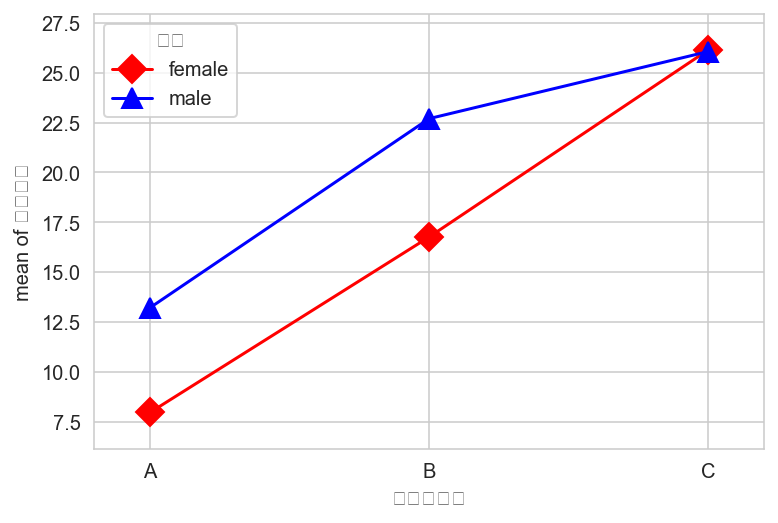

In [21]:
# 아쉽지만 한글은 지원하지 않는 statmodels의 interaction_plot

fig = interaction_plot(data.디자인시안, 
                       data.성별, 
                       data.체류시간, 
                       colors=['red','blue'], 
                       markers=['D','^'], 
                       ms=10)

위 인터랙션 플롯의 해석은 다음과 같다

- 디자인 C가 남녀(hue) 공통에게 가장 오래 홈페이지에 있게 만든다
- 디자인 A와 B는 남자가 더 체류시간이 길다

In [49]:
ad = np.array([2, 5, 1, 3, 4, 1, 5, 3, 4, 2])
amount = np.array([50, 57, 41, 54, 54, 38, 63, 48, 59, 46])
pearsonr, p_value = stats.pearsonr(ad, amount)

print(format(pearsonr, '.10f'))
print(format(p_value, '.10f'))

0.9304905807
0.0000938553


In [37]:
data_pearsonr = pd.read_csv("pearsonr.csv")
data_pearsonr = data_pearsonr.set_index('캠페인_주차')

In [38]:
corr_table = data_pearsonr.corr(method='pearson')

In [39]:
corr_table

,TV_광고횟수,매출액
TV_광고횟수,1.000000,0.930491
매출액,0.930491,1.000000


In [51]:
corr = lambda p : p['매출액'].corr(p['TV_광고횟수'])
pearsonr = corr(data_pearsonr)
print(pearsonr)

0.9304905807411791
